In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from prophet import Prophet
from prophet.serialize import model_to_json
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from pytorch_tabnet.tab_model import TabNetRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import json
import joblib
from joblib import dump



In [30]:
df = pd.read_csv('archive_1/enhanced_health_insurance_claims.csv')

In [31]:
df.head(20)

,ClaimID,PatientID,ProviderID,ClaimAmount,ClaimDate,DiagnosisCode,ProcedureCode,PatientAge,PatientGender,ProviderSpecialty,ClaimStatus,PatientIncome,PatientMaritalStatus,PatientEmploymentStatus,ProviderLocation,ClaimType,ClaimSubmissionMethod
0,10944daf-f7d5-4e1d-8216-72ffa609fe41,8552381d-7960-4f64-b190-b20b8ada00a1,4a4cb19c-4863-41cf-84b0-c2b21aace988,3807.95,2024-06-07,yy006,hd662,16,M,Cardiology,Pending,90279.43,Married,Retired,Jameshaven,Routine,Paper
1,fcbebb25-fc24-4c0f-a966-749edcf83fb1,327f43ad-e3bd-4473-a9ed-46483a0a156f,422e02dd-c1fd-43dd-8af4-0c3523f997b1,9512.07,2023-05-30,tD052,mH831,27,M,Pediatrics,Approved,130448.02,Single,Student,Beltrantown,Routine,Online
2,9e9983e7-9ea7-45f5-84d8-ce49ccd8a4a1,6f3acdf7-73aa-4afa-9c2e-b25b27bdb5b0,f7733b3f-0980-47b5-a7a0-ee390869355b,7346.74,2022-09-27,zx832,dg637,40,F,Cardiology,Pending,82417.54,Divorced,Employed,West Charlesport,Emergency,Online
3,a06273ed-44bb-452b-bbad-8618de080494,5d58e183-701e-406c-a8c6-5b73cac5e912,f7a04581-de96-44ee-b773-8adac02baa59,6026.72,2023-06-25,kr421,kG326,65,M,Neurology,Pending,68516.96,Widowed,Student,West Aprilhaven,Routine,Phone
4,f702a717-254b-4cff-a0c7-8395db2f6616,8a8ebdf6-3af0-4f14-82f3-37b937c3d270,b80b9e77-97f0-47d7-b561-19f9658a7bdf,1644.58,2023-07-24,LZ261,cx805,24,M,General Practice,Pending,84122.17,Married,Student,Lake Michele,Inpatient,Phone
5,78657d24-a96e-461d-970b-d54329d9ceff,6c46c6a2-55c5-47de-a91c-62d26c145105,5c45438c-7854-448c-bd53-7f28a3321133,1644.35,2023-08-09,qM187,no581,57,M,Pediatrics,Pending,95286.87,Widowed,Student,Lake Robert,Outpatient,Paper
6,5e2751ed-c6af-44ed-b95d-c91a19784c9e,71e037fc-cc4d-4a54-bdb1-ab2eda84f310,bedfcca2-7c2c-4d1e-a86b-d2694cbd334b,675.03,2024-05-01,tZ864,hJ616,40,M,Neurology,Approved,44580.09,Divorced,Unemployed,Morenoton,Inpatient,Paper
7,73fe8baf-7689-421a-962d-e3992b67e546,50190ee4-81f2-4f39-85e0-de57f69cb2f9,dc3d59d2-e1f1-4314-b276-bb4ae84b37e9,8675.14,2023-10-24,wO325,RD702,5,M,Cardiology,Approved,137118.00,Married,Unemployed,South Andrew,Inpatient,Online
8,2fb15151-2d53-49db-a95b-35e26edf9c98,61da1afe-54d5-4c0f-88f0-edb09118959e,97145993-2c15-42b2-a738-b999bd669788,6051.04,2023-07-31,rW725,da104,74,F,General Practice,Denied,107644.30,Divorced,Student,Blackburnfurt,Inpatient,Online
9,b5086d7b-f636-4830-9533-a62f4bba719e,720e20a1-6bdf-4f4c-b112-fe32c8552055,1d92ed08-3a88-4ede-84bc-62d879f40327,7109.92,2024-04-13,ss584,UE642,37,M,Neurology,Approved,102324.96,Single,Retired,South Gloriachester,Outpatient,Paper


In [41]:
df.columns

Index(['ClaimID', 'PatientID', 'ProviderID', 'ClaimAmount', 'ClaimDate',
       'DiagnosisCode', 'ProcedureCode', 'PatientAge', 'PatientGender',
       'ProviderSpecialty', 'ClaimStatus', 'PatientIncome',
       'PatientMaritalStatus', 'PatientEmploymentStatus', 'ProviderLocation',
       'ClaimType', 'ClaimSubmissionMethod', 'Prophet_Prediction', 'Residual',
       'Year', 'Month', 'DayOfWeek', 'is_weekend', 'quarter', 'weekofyear',
       'Age_ClaimType', 'Income_Employment'],
      dtype='object')

In [32]:
df.shape

(4500, 17)

In [33]:
df.duplicated().sum()

0

In [34]:
df.isna().sum()

ClaimID                    0
PatientID                  0
ProviderID                 0
ClaimAmount                0
ClaimDate                  0
DiagnosisCode              0
ProcedureCode              0
PatientAge                 0
PatientGender              0
ProviderSpecialty          0
ClaimStatus                0
PatientIncome              0
PatientMaritalStatus       0
PatientEmploymentStatus    0
ProviderLocation           0
ClaimType                  0
ClaimSubmissionMethod      0
dtype: int64

# Feature Engineering for prophet fitting.

In [ ]:
# Prepare Prophet-compatible data
df_prophet = df[['ClaimDate', 'ClaimAmount']].rename(columns={'ClaimDate': 'ds', 'ClaimAmount': 'y'})

# Fit the model
prophet = Prophet()
prophet.fit(df_prophet)



# Forecast (no future periods)
future = prophet.make_future_dataframe(periods=0)
forecast = prophet.predict(future)

# Select relevant columns and rename
forecast = forecast[['ds', 'yhat']].rename(columns={'ds': 'ClaimDate', 'yhat': 'Prophet_Prediction'})

# Convert dates for safe merging
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])
forecast['ClaimDate'] = pd.to_datetime(forecast['ClaimDate'])

# Merge forecast into original df
df = df.merge(forecast, on='ClaimDate', how='left')

# Calculate residuals
df['Residual'] = df['ClaimAmount'] - df['Prophet_Prediction']


df['ClaimDate'] = pd.to_datetime(df['ClaimDate'])
df['Year'] = df['ClaimDate'].dt.year
df['Month'] = df['ClaimDate'].dt.month
df['DayOfWeek'] = df['ClaimDate'].dt.dayofweek
df['is_weekend'] = df['DayOfWeek'] >= 5
df['quarter'] = df['ClaimDate'].dt.quarter
df['weekofyear'] = df['ClaimDate'].dt.isocalendar().week.astype(int)

00:10:45 - cmdstanpy - INFO - Chain [1] start processing
00:10:45 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# Interaction terms
df['Age_ClaimType'] = df['PatientAge'] * df['ClaimType'].astype('category').cat.codes
df['Income_Employment'] = df['PatientIncome'] * df['PatientEmploymentStatus'].astype('category').cat.codes

In [39]:
# Target encoding for high-cardinality features
high_card_cat = ['DiagnosisCode', 'ProcedureCode']
te = TargetEncoder(cols=high_card_cat)
df[high_card_cat] = te.fit_transform(df[high_card_cat], df['Residual'])

In [74]:
features

['Year',
 'Month',
 'DayOfWeek',
 'PatientAge',
 'PatientIncome',
 'ClaimType',
 'PatientEmploymentStatus',
 'DiagnosisCode',
 'ProcedureCode',
 'Age_ClaimType',
 'Income_Employment',
 'PatientGender',
 'ProviderSpecialty',
 'ClaimStatus',
 'ProviderLocation',
 'ClaimSubmissionMethod',
 'is_weekend',
 'quarter',
 'weekofyear']

In [45]:
# Step 1: Separate features and target
X = df[features].copy()
y = df['Residual']

# Step 2: Encode categorical features
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 3: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Residual Modeling

## Preprocessing

## Machine Learning

In [49]:

def tune_model(estimator, param_grid, X_train, y_train, cv=3, n_iter=None):
    if n_iter:  # Randomized search
        search = RandomizedSearchCV(estimator, param_grid, n_iter=n_iter, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    else:  # Grid search
        search = GridSearchCV(estimator, param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    search.fit(X_train_scaled, y_train)
    print(f"Best params for {estimator.__class__.__name__}: {search.best_params_}")
    return search.best_estimator_

print("Tuning RandomForest...")
rf_params = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 30, 50], 'min_samples_split': [2, 5, 7, 9], 'min_samples_leaf': [1, 2, 3, 4, 5]}
rf_best = tune_model(RandomForestRegressor(random_state=42), rf_params, X_train_scaled, y_train)

print("Tuning XGBoost...")
xgb_params = {'n_estimators': [100, 300, 500], 'max_depth': [3, 6,9], 'learning_rate': [0.01, 0.1], 'subsample': [0.8, 1]}
xgb_best = tune_model(XGBRegressor(random_state=42, verbosity=0), xgb_params, X_train_scaled, y_train)

print("Tuning KNN...")
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_best = tune_model(KNeighborsRegressor(), knn_params, X_train_scaled, y_train)

print("Tuning MLP...")
mlp_params = {'hidden_layer_sizes': [(64, 32), (100,)], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001], 'max_iter': [500]}
mlp_best = tune_model(MLPRegressor(random_state=42), mlp_params, X_train_scaled, y_train)

# Linear Regression (no tuning)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

Tuning RandomForest...
Best params for RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 100}
Tuning XGBoost...
Best params for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Tuning KNN...
Best params for KNeighborsRegressor: {'n_neighbors': 7, 'weights': 'distance'}
Tuning MLP...
Best params for MLPRegressor: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (64, 32), 'max_iter': 500}


c:\Users\Computer\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


LinearRegression()

## Deep Learning

c:\Users\Computer\anaconda3\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8190172.06159| val_rmse: 2801.79946|  0:00:02s
epoch 10 | loss: 346869.28977| val_rmse: 506.49253|  0:00:26s
epoch 20 | loss: 276080.75927| val_rmse: 155.27176|  0:00:52s
epoch 30 | loss: 210336.44758| val_rmse: 162.46343|  0:01:17s
epoch 40 | loss: 176145.1339| val_rmse: 283.50797|  0:01:42s

Early stopping occurred at epoch 48 with best_epoch = 28 and best_val_rmse = 143.30469


c:\Users\Computer\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


<Figure size 1000x500 with 0 Axes>

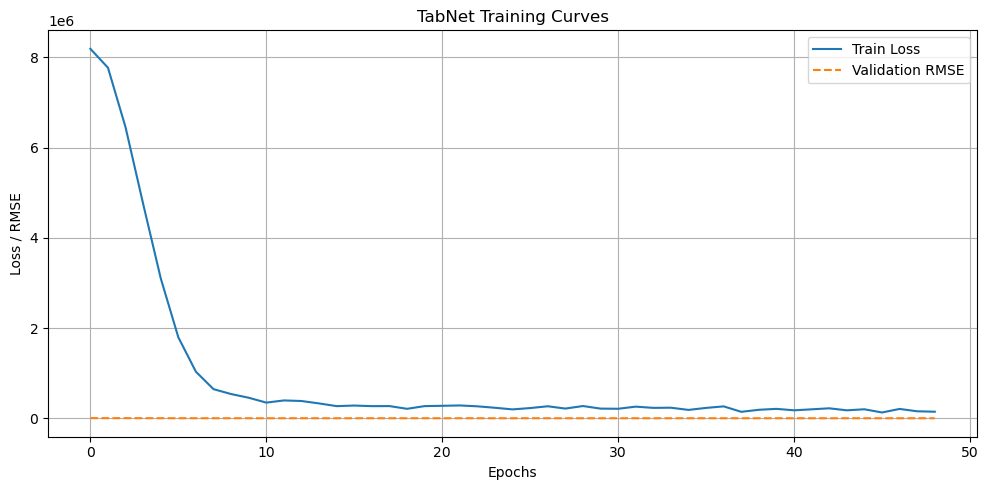

In [55]:

# ====== TabNet with Early Stopping & Training Curves ======
tabnet = TabNetRegressor(
    optimizer_params={"lr": 2e-2},
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=10,
)

tabnet.fit(
    X_train_scaled, y_train.values.reshape(-1, 1),
    eval_set=[(X_test_scaled, y_test.values.reshape(-1, 1))],
    eval_name=["val"],
    eval_metric=["rmse"],
    max_epochs=200,
    patience=20,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
)

# ====== Plot TabNet Training and Validation Loss ======
plt.figure(figsize=(10, 5))

# Access losses from tabnet.history (History object)
train_loss = tabnet.history["loss"]
val_rmse = tabnet.history["val_rmse"]

# Plot training and validation curves
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Train Loss")
plt.plot(val_rmse, label="Validation RMSE", linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss / RMSE")
plt.title("TabNet Training Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Epoch 1/1000 - Train Loss: 8222273.5960, Val Loss: 7990081.0000
Epoch 2/1000 - Train Loss: 8188030.4545, Val Loss: 7966905.0000
Epoch 3/1000 - Train Loss: 8164074.0606, Val Loss: 7927655.0000
Epoch 4/1000 - Train Loss: 8109181.3333, Val Loss: 7880331.5000
Epoch 5/1000 - Train Loss: 8066944.6818, Val Loss: 7830883.0000
Epoch 6/1000 - Train Loss: 8023945.7374, Val Loss: 7782662.5000
Epoch 7/1000 - Train Loss: 7981952.1465, Val Loss: 7736610.5000
Epoch 8/1000 - Train Loss: 7926219.3182, Val Loss: 7692179.0000
Epoch 9/1000 - Train Loss: 7863692.7424, Val Loss: 7649746.5000
Epoch 10/1000 - Train Loss: 7835907.6061, Val Loss: 7609041.5000
Epoch 11/1000 - Train Loss: 7800486.7626, Val Loss: 7569581.0000
Epoch 12/1000 - Train Loss: 7759721.1515, Val Loss: 7531479.0000
Epoch 13/1000 - Train Loss: 7712205.6263, Val Loss: 7494289.0000
Epoch 14/1000 - Train Loss: 7684240.3535, Val Loss: 7458188.5000
Epoch 15/1000 - Train Loss: 7645048.2323, Val Loss: 7422853.0000
Epoch 16/1000 - Train Loss: 760570

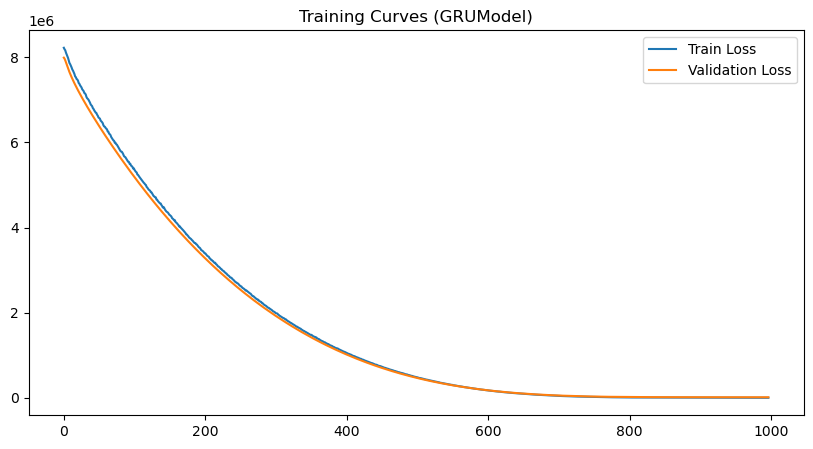

In [58]:
# ====== PyTorch LSTM/GRU with Early Stopping and Training Curves ======

class EarlyStopping:
    def __init__(self, patience=10, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter +=1
            if self.counter >= self.patience:
                self.early_stop = True

class LSTMModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc = nn.Linear(64,1)

    def forward(self, x):
        x, _ = self.lstm(x)
        return self.fc(x[:, -1, :])

class GRUModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.gru = nn.GRU(input_dim, 64, batch_first=True)
        self.fc = nn.Linear(64,1)

    def forward(self, x):
        x, _ = self.gru(x)
        return self.fc(x[:, -1, :])

def train_pytorch_model_with_early_stop(model, train_dl, val_data, epochs=1000, patience=10):
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    early_stopping = EarlyStopping(patience=patience)
    train_losses, val_losses = [], []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for xb, yb in train_dl:
            optimizer.zero_grad()
            pred = model(xb)
            loss = loss_fn(pred, yb)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_dl)

        model.eval()
        with torch.no_grad():
            val_pred = model(val_data[0])
            val_loss = loss_fn(val_pred, val_data[1]).item()

        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

    # Plot training curves
    plt.figure(figsize=(10,5))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.title(f"Training Curves ({model.__class__.__name__})")
    plt.legend()
    plt.show()
    return model


X_tensor_train = torch.tensor(X_train_scaled, dtype=torch.float32).unsqueeze(1)
y_tensor_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_tensor_val = torch.tensor(X_test_scaled, dtype=torch.float32).unsqueeze(1)
y_tensor_val = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_ds = TensorDataset(X_tensor_train, y_tensor_train)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

gru_model = GRUModel(X_train_scaled.shape[1])
gru_model = train_pytorch_model_with_early_stop(gru_model, train_dl, (X_tensor_val, y_tensor_val))

# Model Evaluation & Dynamic Saving

In [ ]:

models = {
'RandomForest': rf_best,
'XGBoost': xgb_best,
'KNN': knn_best,
'MLP': mlp_best,
'LinearRegression': lr,
'TabNet': tabnet
# GRU can be saved separately if desired
}

results = {}
for name, model in models.items():
    if name == 'TabNet':
        preds = model.predict(X_test_scaled).squeeze()
    else:
        preds = model.predict(X_test_scaled)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # Fixed line
    r2 = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Save best model and prophet model
dump(prophet, 'prophet_model.pkl')
print("Prophet model saved successfully!")
best_model_name = min(results, key=lambda k: results[k]['RMSE'])
best_model = models[best_model_name]
joblib.dump(best_model, f"best_residual_model_{best_model_name}.pkl")
joblib.dump(scaler, "residual_model_scaler.pkl")
joblib.dump(te, "residual_model_encoder.pkl")
joblib.dump({
    'features': features,
    'high_card_cat': high_card_cat,
    'train_columns': X_train.columns.tolist()
}, 'model_metadata.pkl')

print(f"\nBest model: {best_model_name} saved.")


RandomForest - RMSE: 105.6377, R2: 0.9986
XGBoost - RMSE: 121.4804, R2: 0.9982
KNN - RMSE: 865.9815, R2: 0.9062
MLP - RMSE: 94.2028, R2: 0.9989
LinearRegression - RMSE: 86.4111, R2: 0.9991
TabNet - RMSE: 143.3047, R2: 0.9974

Best model: LinearRegression saved.


In [81]:
with open('prophet_model.json', 'w') as fout:
    json.dump(model_to_json(prophet), fout)

# Markdown

## Predict Function for Deployment 

In [68]:
def predict_new_claim(df_new, prophet_model, residual_model, scaler, encoder):
    df_new['ClaimDate'] = pd.to_datetime(df_new['ClaimDate'])
    prophet_input = df_new[['ClaimDate', 'ClaimAmount']].rename(columns={'ClaimDate': 'ds', 'ClaimAmount': 'y'})
    forecast = prophet_model.predict(prophet_input)
    df_new['Prophet_Prediction'] = forecast['yhat'].values

    df_new['Year'] = df_new['ClaimDate'].dt.year
    df_new['Month'] = df_new['ClaimDate'].dt.month
    df_new['DayOfWeek'] = df_new['ClaimDate'].dt.dayofweek
    df_new['Age_ClaimType'] = df_new['PatientAge'] * df_new['ClaimType'].astype('category').cat.codes
    df_new['Income_Employment'] = df_new['PatientIncome'] * df_new['EmploymentStatus'].astype('category').cat.codes

    df_new[high_card_cat] = encoder.transform(df_new[high_card_cat])
    X_new = df_new[features]
    X_new = pd.get_dummies(X_new, columns=['ClaimType', 'EmploymentStatus'], drop_first=True)
    X_new = X_new.reindex(columns=X_train.columns, fill_value=0)
    X_new_scaled = scaler.transform(X_new)

    if isinstance(residual_model, TabNetRegressor):
        residual_pred = residual_model.predict(X_new_scaled).squeeze()
    else:
        residual_pred = residual_model.predict(X_new_scaled)

    return df_new['Prophet_Prediction'] + residual_pred
